---
---

<span style='color:red'>
    
# Project 1: Predicting House Prices with Linear Regression

</span>


>*Machine Learning Foundations for Beginners*
>
>*Codecademy Live Learning*

---
---

<span style='color:brown'>

    
# 1. Overview

>In this project, you will build a linear regression model to predict housing prices using the `Ames Housing dataset`. This is a real-world dataset containing information
>about residential homes in **Ames**, **Iowa**.

---

<span style='color:brown'>


## 1.1. Learning Objectives

</span>

>- Perform exploratory data analysis (EDA)
>- Engineer meaningful features for prediction
>- Train and evaluate a linear regression model
>- Interpret model results and coefficients
>- Create professional documentation for your portfolio

---

<span style='color:brown'>


## 1.2. Deliverables

</span>

>A completed Jupyter notebook that includes:
>
>   1. Clear explanations of your methodology
>   2. Visualizations of data and results
>   3. A trained linear regression model
>   4. Evaluation metrics and interpretation
>   5. Reflection on results and potential improvements

---

<span style='color:brown'>

## 1.3. Instructions

</span>


>1. Save a copy of this .ipynb in your own Google Drive.
>
>2. Run the code in the Setup section and upload the AmesHousing.csv
>    - The file will be shared in Discord.
>    - Alternatively, you can download it from Kaggle [here](https://www.kaggle.com/datasets/marcopale/housing)
>
>3. Work through each section to explore the data, train the model, and interpret the results.
>    - You can review the lecture slides+recording and see other examples from the instructor to help.
>    - If you are stuck, post a question in #doubts in Discord.
>
>4. When you are finished, share a link to your notebook in the `#project-showcase` channel in Discord. Also considering creating a git repo and publishing your notebook on GitHub.
>
>There are a mix of code cells and text cells. Write your code in the code cells and add comments and documentation as needed to explain the code itself. Use the text cells to explain your observations, thought process, and decisions. Imagine you are a working as a Data Scientist and are presenting your findings to your company.

---
---

<span style='color:brown'>

# 2. Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Set random seed for reproducibility
np.random.seed(42)

# Configure visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---
---

<span style='color:brown'>


## 2.1. Load the dataset from CSV

In [2]:
#from google.colab import files
#uploaded = files.upload()

In [3]:
df = pd.read_csv('datasets/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


---
---

<span style='color:brown'>


# 3. Exploratory Data Analysis

In [4]:
# TODO: Display basic information about the dataset
# Suggested explorations:

# - What are the dimensions of the dataset?
print("Dataset shape:", df.shape)

Dataset shape: (2930, 82)


In [5]:
# - What columns are available sorted alphabetically?
project_colums = df.columns
print('The columns of the project are:\n\n', project_colums.sort_values())

The columns of the project are:

 Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo So

In [6]:
# - What are the data types?
print("The data types of the data set are:\n")
df.info()

The data types of the data set are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 n

In [7]:
# configure 90 rows as the max number of rows, and 90 columns as the max number of columns to print
pd.set_option('display.max_rows', 90, 'display.max.columns', 90)
df.sample(7)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1357,1358,903427090,70,RM,NaN,5100,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,7,1925,1996,Hip,CompShg,Stucco,Wd Shng,NaN,0.0,TA,Gd,PConc,TA,TA,No,Unf,0.0,Unf,0.0,588.0,588.0,GasA,Fa,Y,SBrkr,833,833,0,1666,0.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1.0,228.0,TA,TA,Y,192,63,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,161000
2367,2368,527450460,160,RM,21.0,1890,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,7,1972,1972,Gable,CompShg,HdBoard,HdBoard,BrkFace,380.0,TA,TA,CBlock,TA,TA,No,ALQ,282.0,Unf,0.0,212.0,494.0,GasA,Ex,Y,SBrkr,494,536,0,1030,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,1973.0,Unf,1.0,264.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,116000
2822,2823,908128100,60,RL,62.0,7162,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,7,5,2003,2004,Hip,CompShg,HdBoard,Stucco,BrkFace,190.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,796.0,796.0,GasA,Ex,Y,SBrkr,806,918,0,1724,0.0,0.0,2,1,3,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2.0,616.0,TA,TA,Y,168,57,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,196500
2126,2127,907135180,20,RL,60.0,8070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588.0,Unf,0.0,402.0,990.0,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,123600
1544,1545,910200080,30,RM,50.0,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,6,8,1926,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,BrkTil,TA,TA,No,Rec,299.0,GLQ,40.0,555.0,894.0,GasA,TA,Y,SBrkr,919,0,0,919,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1926.0,Unf,1.0,195.0,TA,TA,P,0,0,116,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,126000
2415,2416,528221010,20,RL,102.0,11660,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1326.0,1326.0,GasA,Ex,Y,SBrkr,1326,0,0,1326,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2006.0,Fin,2.0,427.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,174190
2227,2228,909455060,120,RM,35.0,3907,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Blueste,Norm,Norm,TwnhsE,1Story,8,5,1988,1988,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,577.0,Unf,0.0,427.0,1004.0,GasA,Gd,Y,SBrkr,1020,0,0,1020,1.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Attchd,1988.0,Unf,2.0,509.0,TA,TA,Y,135,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,200000


---

<span style='color:brown'>

## 3.1. Distribution of the Target Variable (SalePrice)

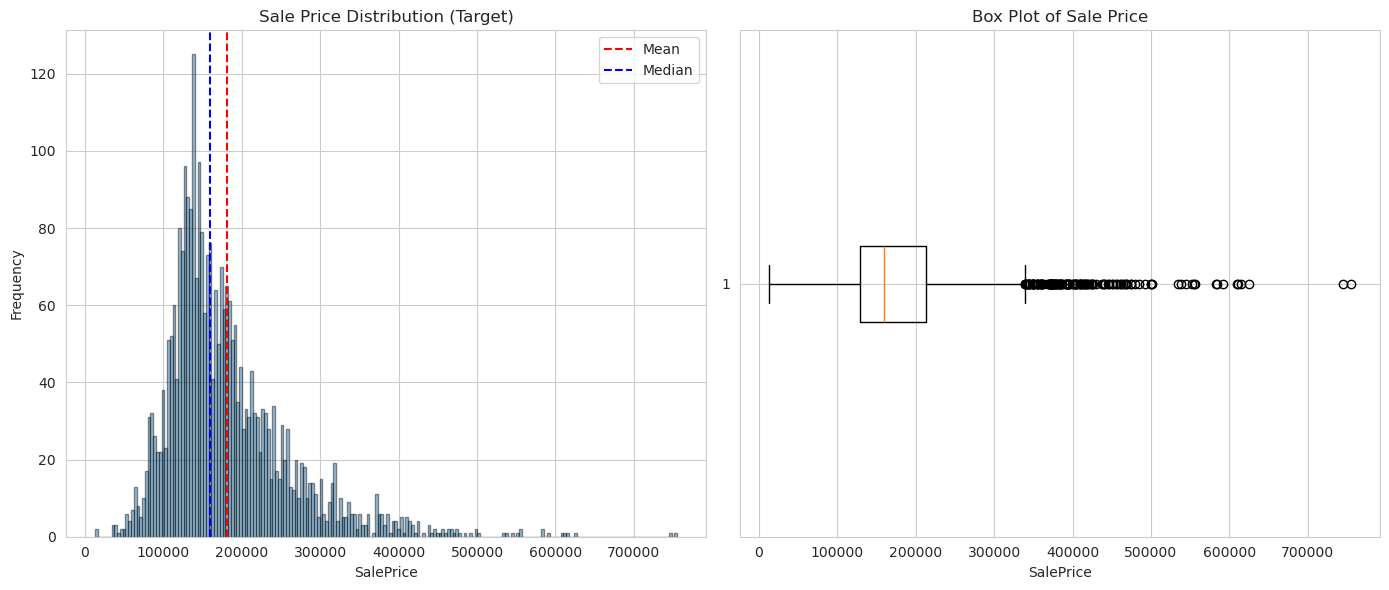

In [8]:
# Visualize Target Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogram
axes[0].hist(df['SalePrice'], bins=210, edgecolor='black', alpha=0.45)
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sale Price Distribution (Target)')

axes[0].axvline(df['SalePrice'].mean(), color='red', linestyle='--', label='Mean')
axes[0].axvline(df['SalePrice'].median(), color='blue', linestyle='--', label='Median')
axes[0].legend()

# Boxplot
axes[1].boxplot(df['SalePrice'], vert=False) #Horizontal boxplot is often easier to read
axes[1].set_xlabel('SalePrice')
axes[1].set_title('Box Plot of Sale Price')

plt.tight_layout()
plt.show()

In [9]:
# Skewness
print(f"The Skewness on SalePrice is : {df['SalePrice'].skew():.2f}")

The Skewness on SalePrice is : 1.74


---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- The histogram shows that the distribution of `SalesPrice` has a positive skewness (the tail extends towards extremely high values).**The skewness value obtained is 1.74** (strong positive skewness).

- Most housing data shows standard prices between 100,000 and 200,000 USD.

- The box plot shows that there are several outliers at the upper end, starting from 350,000 USD.


</div>

---

---


<span style='color:brown'>

## 3.2. Relationships between features and target

In [10]:
# Features VS. Target
numeric_features = df.select_dtypes(include=[np.number])
categorical_features = df.select_dtypes(include=['object'])

print('-'*100)
print(f"Total number of numerical variables: {len(numeric_features.columns)}")
print(f"Total number of categorical variables: {len(categorical_features.columns)}")
print('-'*100)
print("Numerical Features (Sample): ", numeric_features.columns[:5].tolist())
print("Categorical Features (Sample): ", categorical_features.columns[:5].tolist())
print('-'*100)

----------------------------------------------------------------------------------------------------
Total number of numerical variables: 39
Total number of categorical variables: 43
----------------------------------------------------------------------------------------------------
Numerical Features (Sample):  ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area']
Categorical Features (Sample):  ['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour']
----------------------------------------------------------------------------------------------------



---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- We have more `categorical variables` than `numerical ones`. This is crucial because linear regression only "understands" **numbers**.

- This indicates that we will have to do a lot of coding work (`One-Hot Encoding` or `Label Encoding`) in the next phase.

</div>

---


---

<span style='color:brown'>

## 3.3. Correlation analysis

In [11]:
# Correlation Matrix
corr_matrix = numeric_features.corr()

# sort the matrix in descending order on 'SalePrice' column
corr_matrix.sort_values(by='SalePrice', ascending=False)['SalePrice']

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Order             -0.031408
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- From the upper series cell we can see than after sorting from higher to lower, only the first 10 features have relevant correlation. So I the matrix heatmap will consider only that range of features.

</div>

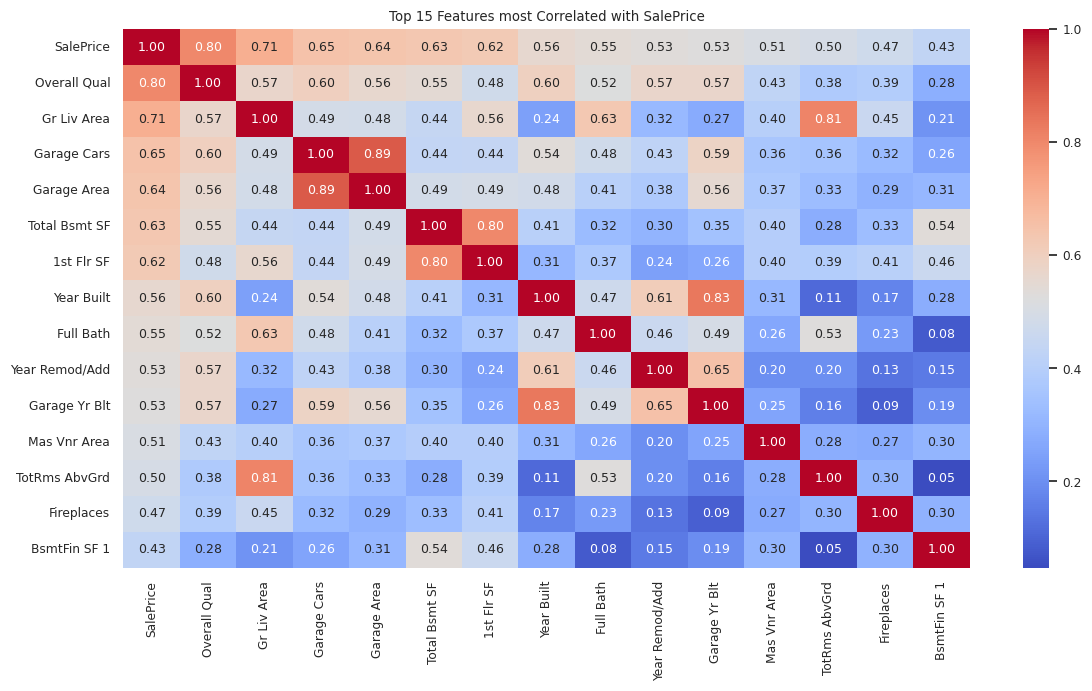

In [12]:
# Select the names of the "n" higest feature-values correlated with SalePrice
n = 15
cols = corr_matrix.sort_values(by='SalePrice', ascending=False)['SalePrice'][:n].index

# Correlation Filtered Matrix
filtered_matrix = corr_matrix[cols].sort_values(by='SalePrice', ascending=False).iloc[:n,:]

# Heatmap Plot
plt.figure(figsize=(12, 7))
sns.set(font_scale=0.8)
sns.heatmap(filtered_matrix, cbar=True, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size':9})

plt.title(f'Top {n} Features most Correlated with SalePrice')
plt.tight_layout()
plt.show()

---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- The features that have more impact on "SalePrice" are:

   1. **`Overall Quality`: 0.799**
   2. **`Ground Living Area`: 0.706**
   3. **`Garage Cars`: 0.647**
   4. **`Garage Area`: 0.640**
   5. **`Total Basement Square Feet`: 0.632**
   6. **`First Floor Square Feet`: 0.621**
   7. <span style='color:gray'>**Year Built**: 0.558 --> (weak)
   8. <span style='color:gray'>**Full Bath**: 0.545 --> (weak)
   9. <span style='color:gray'>**Year Remodel/Add**: 0.532 --> (weak)
   10. <span style='color:gray'>**Garage Year Built**: 0.526 --> (weak)

--- 

- **NOTE:** Garage Cars (0.647) and Garage Area (0.640). They have an almost identical correlation with price and a very high correlation with each other (multicollinearity). If we include both in the model, they will "steal" weight from each other. We should choose only one.

</div>

---

---

<span style='color:brown'>

## 3.4. Potential Outliers

In [13]:
# ---------------------------------------------------------------------------------------
# Potential Outlier for SalePrice
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
saleprice_out = Q3 + 1.5*IQR #
print(f'1. Lower Limit for Potencial Outliners on SalePrice:\t\t{saleprice_out}\n')

# ==============================================================================================
# Will select the multiplier for adjusting the outliers starting point - INSTEAD OF Q3 + 1.5IQR
# PROPOSED CALCULATION FOR THIS TASK
number = 2.5
# ==============================================================================================

# ---------------------------------------------------------------------------------------
# Potential Outlier Identification 1
Q1 = df['Gr Liv Area'].quantile(0.25)
Q3 = df['Gr Liv Area'].quantile(0.75)
IQR = Q3 - Q1
GrLivArea_out = Q3 + number*IQR
print(f'2. Lower Limit for Potencial Outliners on Gr Liv Area:\t\t{GrLivArea_out}')

# Potential Outlier Identification 2 
Q1 = df['Total Bsmt SF'].quantile(0.25)
Q3 = df['Total Bsmt SF'].quantile(0.75)
IQR = Q3 - Q1
TotBsmtSF_out = Q3 + number*IQR
print(f'3. Lower Limit for Potencial Outliners on Total Bsmt SF:\t{TotBsmtSF_out}')

# Potential Outlier Identification 3
Q1 = df['1st Flr SF'].quantile(0.25)
Q3 = df['1st Flr SF'].quantile(0.75)
IQR = Q3 - Q1
FrstFlrSF_out = Q3 + number*IQR
print(f'4. Lower Limit for Potencial Outliners on 1st Flr SF:\t\t{FrstFlrSF_out}')


1. Lower Limit for Potencial Outliners on SalePrice:		339500.0

2. Lower Limit for Potencial Outliners on Gr Liv Area:		3284.625
3. Lower Limit for Potencial Outliners on Total Bsmt SF:	2574.5
4. Lower Limit for Potencial Outliners on 1st Flr SF:		2653.375


------------------------------------------------------------------------------------------------------------------------
Confirmed Outliers by similar indexes on different Features: [2180, 2181, 1498, 1497]

Multiplier used for the upper fence (Q3 + N*IQR):  N=2.5
------------------------------------------------------------------------------------------------------------------------


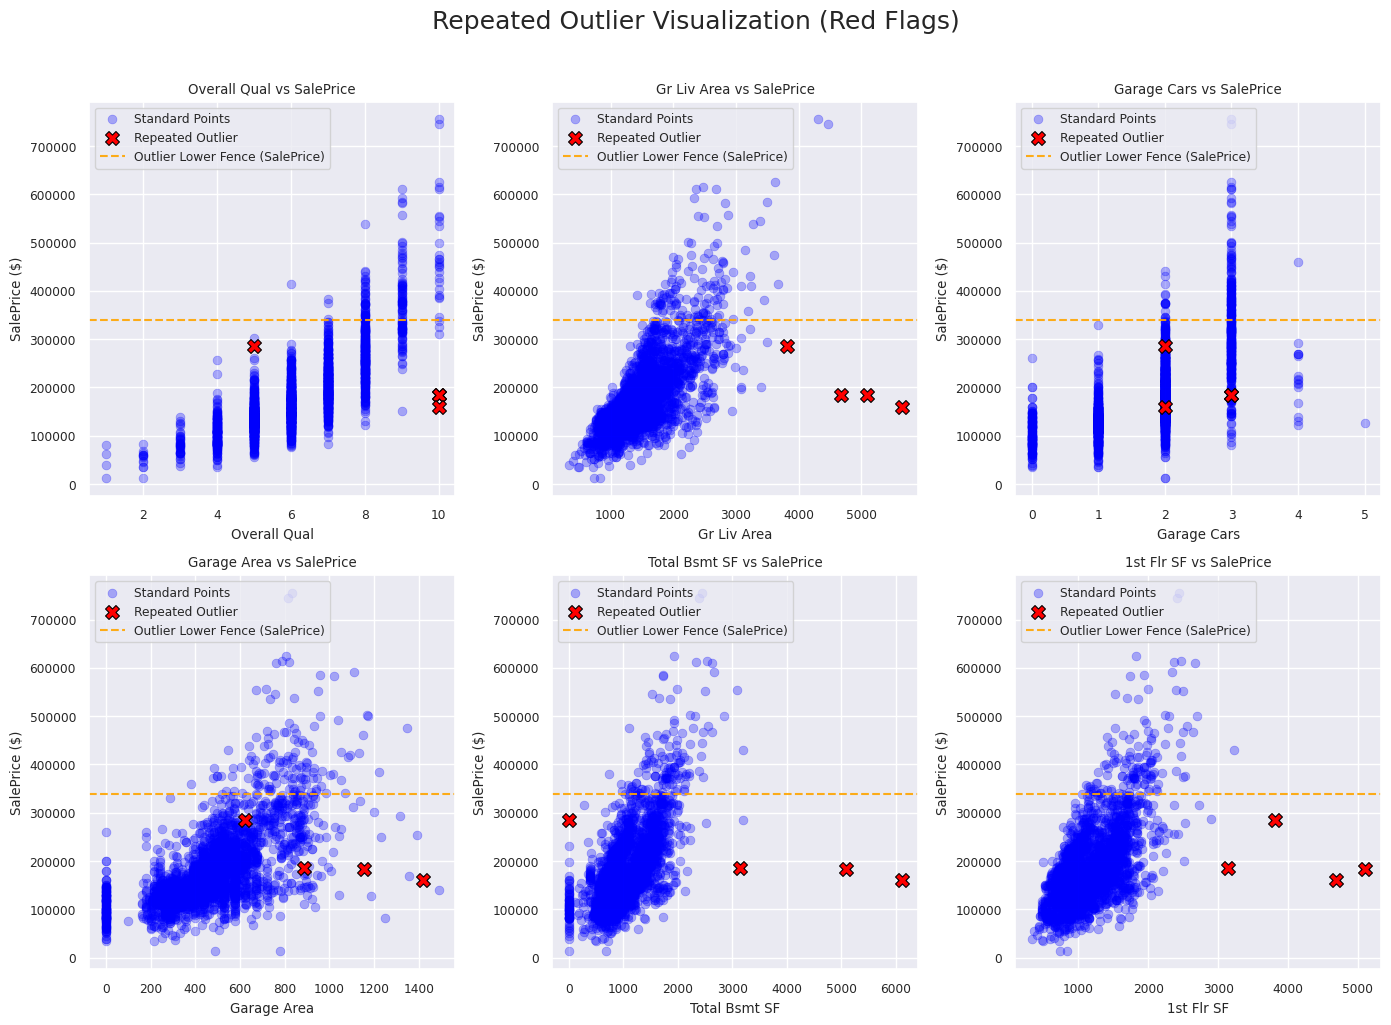

In [14]:
# 1. Outlier Identification by Proposed Criteria
# ------------------------------------------
# Use the upper cell results to identify potential Outliers
out_grliv = set(df[(df['Gr Liv Area'] > GrLivArea_out) & (df['SalePrice'] < saleprice_out)].index)
out_bsmt = set(df[(df['Total Bsmt SF'] > TotBsmtSF_out) & (df['SalePrice'] < saleprice_out)].index)
out_1stflr = set(df[(df['1st Flr SF'] > FrstFlrSF_out) & (df['SalePrice'] < saleprice_out)].index)

# We need to find the repeated index on selected features
all_outliers = list(out_grliv) + list(out_bsmt) + list(out_1stflr)

# Creates a counting dictionary to identify repeated indexes
from collections import Counter
counts = Counter(all_outliers)

# Find the counters that are bigger than 1
repeated_indices = [idx for idx, count in counts.items() if count > 1]
print('-'*120)
print(f"Confirmed Outliers by similar indexes on different Features: {repeated_indices}\n\nMultiplier used for the upper fence (Q3 + N*IQR):  N={number}")
print('-'*120)


# 2. Scatterplots with Gemini's help
top_features = list(cols[1:7])

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(top_features):
    # Normal Plot (Blue points)
    sns.scatterplot(data=df, x=col, y='SalePrice', ax=axes[i], 
                    color='blue', alpha=0.3, s=40, edgecolor=None, label='Standard Points')
    
    # Highlight repeated Outliers(X in RED color)
    outlier_data = df.loc[repeated_indices]
    sns.scatterplot(data=outlier_data, x=col, y='SalePrice', ax=axes[i], 
                    color='red', s=100, edgecolor='black', marker='X', label='Repeated Outlier')

    # Reference Line for SalePrice (Outlier lower fence)
    axes[i].axhline(y=saleprice_out, color='orange', linestyle='--', linewidth=1.5, alpha=0.9, label='Outlier Lower Fence (SalePrice)')
    
    axes[i].set_title(f'{col} vs SalePrice')
    axes[i].set_ylabel('SalePrice ($)')
    axes[i].legend(loc='upper left')

plt.suptitle('Repeated Outlier Visualization (Red Flags)', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- To identify potential outliers in the numerical characteristics of this dataset, I decided to consider **adjusting the lower bound of outliers by changing the multiplier of 1.5 in the formula to a new one that I corrected myself while running the last cell**. For this, I used different numbers in a range from 1.6 to 3.0. I performed this task several times until I found a result that I considered attractive for this project. Perhaps the results of my methodology are incorrect, but I wanted to propose it for identifying potential outliers.

</div>

---

---

<span style='color:brown'>

## 3.5. Understanding Categorical VS. Numerical Features

In [15]:
# 1. Data type split
# --------------------------------------
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"--------- Summary Count ---------")
print(f"Numerical Features (int, float): {len(numeric_cols)}")
print(f"Categorical Features (Object):   {len(categorical_cols)}")

--------- Summary Count ---------
Numerical Features (int, float): 39
Categorical Features (Object):   43


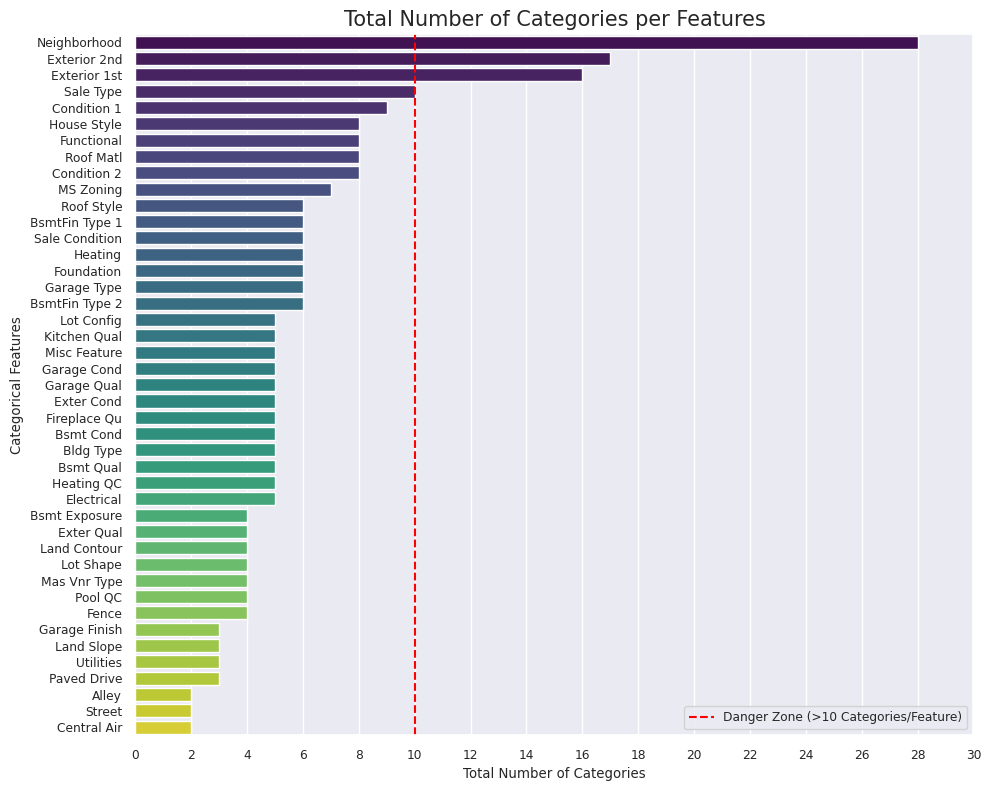

In [16]:
# --------------------------------------------------------------------------------------
# 2. Cardinality Analysis (How many unique values does each categorical category have?)
cardinality = df[categorical_cols].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y=cardinality.index, x=cardinality.values, palette='viridis', hue=cardinality.index)
plt.title('Total Number of Categories per Features', fontsize=15)
plt.xlabel('Total Number of Categories')
plt.ylabel('Categorical Features')
plt.axvline(x=10, color='red', linestyle='--', label='Danger Zone (>10 Categories/Feature)')
plt.xticks(range(0,31, 2))
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# Now I will take a look at the categorical features and try to identify any pattern for Ordinal Categorical Features
df[categorical_cols].sample(15, random_state=42)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
1357,RM,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,Hip,CompShg,Stucco,Wd Shng,NaN,TA,Gd,PConc,TA,TA,No,Unf,Unf,GasA,Fa,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2367,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2822,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,Hip,CompShg,HdBoard,Stucco,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2126,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1544,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,TA,Gd,BrkTil,TA,TA,No,Rec,GLQ,GasA,TA,Y,SBrkr,TA,Typ,NaN,Detchd,Unf,TA,TA,P,NaN,MnPrv,NaN,WD,Normal
2415,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,NaN,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,New,Partial
2227,RM,Pave,NaN,IR1,Bnk,AllPub,Inside,Mod,Blueste,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,NaN,TA,TA,CBlock,Gd,TA,Gd,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
410,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,Gable,CompShg,Plywood,Brk Cmn,NaN,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
761,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,Gd,CBlock,Fa,TA,No,Unf,Unf,GasA,Ex,Y,FuseA,Fa,Typ,NaN,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
436,RL,Pave,NaN,IR3,Lvl,AllPub,CulDSac,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Family


In [18]:
# Ordinal Variables Detection
# ---------------------------------------------------------
# Some columns use the scale : Ex (Excellent), Gd (Good), TA (Typical), Fa (Fair), Po (Poor)
# We will identify which ones use this vocabulary so as not to treat them as mere labels.
ordinal_candidates = []
for col in categorical_cols:
    unique_vals = df[col].unique().astype(str)
    if 'Gd' in unique_vals and 'TA' in unique_vals:
        ordinal_candidates.append(col)

print('-'*120)
print("    🕵️‍♂️ Ordinal Categorical Variables Detected ")
for n in range(len(ordinal_candidates)):
    print(f'{n+1:>2}: {ordinal_candidates[n]}')
    
print(f"\nNOTE: These columns should NOT be passed to One-Hot Encoding, we must map them.")
print('-'*120)

------------------------------------------------------------------------------------------------------------------------
    🕵️‍♂️ Ordinal Categorical Variables Detected 
 1: Exter Qual
 2: Exter Cond
 3: Bsmt Qual
 4: Bsmt Cond
 5: Heating QC
 6: Kitchen Qual
 7: Fireplace Qu
 8: Garage Qual
 9: Garage Cond
10: Pool QC

NOTE: These columns should NOT be passed to One-Hot Encoding, we must map them.
------------------------------------------------------------------------------------------------------------------------


---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- Among the characteristics of the categorical variables in this project, some belong to a **"Nominal Category"** and others to an **"Ordinal Category"**. The cell above seeks a very simple pattern that attempts to identify the **"Nominal Categories"** within each Categorical Characteristic.

- To achieve this, I searched on the web and discovered that the category **'Gd'** means `Good`, and the category **'TA'** means `Typical`. So I wrote a code to identify those categories within each categorical feature of this dataset and stored their names in the `ordianl_candidates` variable.

</div>

---

---
---

<span style='color:brown'>


# 4. Data Preparation

In [19]:
# We make a copy so as not to touch the original loaded dataframe
df_clean = df.copy()

---

<span style='color:brown'>

## 4.1. Removing the Outliers

In [20]:
# We eliminate the giant houses with low prices
df_clean = df_clean.drop(repeated_indices)
print(f"✅ Removed Outliers: {len(repeated_indices)} records.")

✅ Removed Outliers: 4 records.


---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

- Now is time to remove the four outliers we found in the Step `3.4. Potential Outliers`. Since we are certain that these values will introduce noise into the results that we will obtain from the modelling of our project. **(Garbage In, Garbage Out)**

</div>

---

---

<span style='color:brown'>

## 4.2. Handling Missing Values

In [21]:
# Evaluation of the amount of missing values per each columns of the dataset, scaled in percentage (from higher to lower)
print('Features with Missing Values:\n')
df_na = df_clean.isna().sum().reset_index(name='total_na').sort_values('total_na', ascending=False)
df_na = df_na.assign(percent_na = df_na['total_na']/len(df_clean)*100).reset_index()

# Rename of the Null Values DataFrame
df_na.columns = ['org_index', 'feature', 'total_na', 'percent_na']

# Now we will introduce the dtype of each feature, in order to better understand each feature
df_na['dtype'] = df_na['feature'].map(lambda x: df_clean[x].dtype)

# Now will see all the features that have null values from type and from higher to lower
df_na_sort = df_na[df_na['total_na'] > 0].sort_values(by=['dtype', 'total_na'], ascending=[False, False])
df_na_sort

Features with Missing Values:



,org_index,feature,total_na,percent_na,dtype
0,73,Pool QC,2914,99.589884,object
1,75,Misc Feature,2821,96.411483,object
2,7,Alley,2728,93.233083,object
3,74,Fence,2354,80.451128,object
4,26,Mas Vnr Type,1774,60.628845,object
5,58,Fireplace Qu,1422,48.598770,object
7,64,Garage Qual,159,5.434040,object
9,65,Garage Cond,159,5.434040,object
10,61,Garage Finish,159,5.434040,object
11,59,Garage Type,157,5.365687,object


In [22]:
# ----------------------------------------------------------------------------------------------------------------------------------
# Step 1: Null values present in the following "Object" type features (except Electrical and Mas Vnr Type) will be filled with "None"
cols_with_none = ['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu', 
                  'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
                  'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

for col in cols_with_none:
    df_clean[col] = df_clean[col].fillna('None')


# ----------------------------------------------------------------------------------------------------------------------------------
# Step 2: We will impute all the null values on Lot Frontage with the Median
df_clean['Lot Frontage'] = df_clean['Lot Frontage'].fillna(df_clean['Lot Frontage'].median())


# ----------------------------------------------------------------------------------------------------------------------------------
# Step 3: We will impute the null values of the numeric features with Zero, since that would mean that don't exist
cols_fillna_zero = ['Garage Yr Blt', 'Garage Area', 'Garage Cars',
                    'Total Bsmt SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
                    'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Area']

for col in cols_fillna_zero:
    df_clean[col] = df_clean[col].fillna(0)


# ----------------------------------------------------------------------------------------------------------------------------------
# Estrategia 4: The last categorical features (Mas Vnr Type, Electrical) will be filled with the mode
df_clean['Mas Vnr Type'] = df_clean['Mas Vnr Type'].fillna(df_clean['Mas Vnr Type'].mode()[0])
df_clean['Electrical'] = df_clean['Electrical'].fillna(df_clean['Electrical'].mode()[0])


# ----------------------------------------------------------------------------------------------------------------------------------
new_missing = df_clean.isna().sum().sum()
print(f'The new total of missing values on the dataset are: {new_missing}\n')

print("✅ Missing values correctly handled.")

The new total of missing values on the dataset are: 0

✅ Missing values correctly handled.


---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

1. After taking a look at the `Pool QC` and constrasting with `Pool Area`, I could see that the 2914 null values are due to the lack of pools in those houses.

2. A similar scenario is present for almost all the **object type** features (except `Electrical`). So for almost all object type features I will fill null values with a new category **"None"**.

3. In the feature `Lot Frontage`, It's very likely that all the houses have a lot frontage (the distance from the street to the house), but the seller forgot to note it down.

4. The unique missing value on the `Electrical` Feature needs to have a different value than "None". Beacuase all houses might have electricity. So I will fill this unique missing value with the **Mode**.

5. Finally `Mas Vnr Area` and `Mas Vnr Type` will be filled with the values of `0` and `BrkFace` (*the mode*) respectively. This is because `BrkFace` has the same meaning as `None`. And as all numeric values in `Mas Vnr Area` are also missing values on `Mas Vnr Type`, we close the loop by filling these missing values with `0`.

---

---

<span style='color:brown'>

## 4.3. Encoding Categorical Variables

In [23]:
# -----------------------------------------------------------------------------
# STEP 1. Handle categorical variables (Ordinal Encoding)
# -----------------------------------------------------------------------------
# Before performing One-Hot Encoding, we retrieve the numeric value of the Ordinal variables.
# Mapping based on Ames documentation: Ex(Excellent)->5, Gd(Good)->4, etc.
quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}

ordinal_cols = ['Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Heating QC', 
                'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']

for col in ordinal_cols:
    df_clean[col] = df_clean[col].map(quality_map)

print("✅ The Ordinal Variables have been coded numerically (Scale 0-5).")

# Final Verification
print(f"\nCurrent Dimensions of the cleaned dataset:  {df_clean.shape}")

✅ The Ordinal Variables have been coded numerically (Scale 0-5).

Current Dimensions of the cleaned dataset:  (2926, 82)


In [24]:
df_clean[ordinal_cols].head()

,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Heating QC,Kitchen Qual,Fireplace Qu,Garage Qual,Garage Cond,Pool QC
0,3,3,3,4,2,3,4,3,3,0
1,3,3,3,3,3,3,0,3,3,0
2,3,3,3,3,3,4,0,3,3,0
3,4,3,3,3,5,5,3,3,3,0
4,3,3,4,3,4,3,3,3,3,0


---
---

In [25]:
print(f"Total number of Categorical Features:  {len(categorical_cols)}\n")

print(f"Before Encoding Ordinal Features:\n{categorical_cols}")

Total number of Categorical Features:  43

Before Encoding Ordinal Features:
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')


In [26]:
# STEP 2. IDENTIFICATION OF NOMINAL CATEGORIES
# We have already processed the Ordinal numbers. Those that remain as 'object' are the Nominal numbers.
categorical_cols = df_clean.select_dtypes(include=['object']).columns

print(f"Categorical Features to be coded (One-Hot Encoding): {len(categorical_cols)}\n")

print(f"Nominal Features to encode:\n{categorical_cols}")

Categorical Features to be coded (One-Hot Encoding): 33

Nominal Features to encode:
Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating',
       'Central Air', 'Electrical', 'Functional', 'Garage Type',
       'Garage Finish', 'Paved Drive', 'Fence', 'Misc Feature', 'Sale Type',
       'Sale Condition'],
      dtype='object')


In [27]:
# STEP 3. IMPLEMENTATION OF ONE-HOT ENCODING 
# --------------------------------------------
# drop_first=True is CRUCIAL in Linear Regression to avoid perfect "collinearity".
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True, dtype='int')

# ----------------------------------------------------------------------------
print("\n( ENCODING RESULT )")
print('-'*150)
print(f"Original Dimensions: {df_clean.shape}")
print(f"Total Dimensions after One-Hot Encoding: {df_encoded.shape}")

# ----------------------------------------------------------------------------
# Verify that no text remains
remaining_objects = df_encoded.select_dtypes(include=['object']).columns
print(f"Remaining text columns: {len(remaining_objects)}") # Should be ZERO

# Show the new columns generated for 'Neighborhood' as an example
print('-'*150)
neighborhood_cols = [col for col in df_encoded.columns if 'Neighborhood' in col]
print(f"New columns on Neighborhoods: {neighborhood_cols}")
print('-'*150, '\n')

df_encoded.head()


( ENCODING RESULT )
------------------------------------------------------------------------------------------------------------------------------------------------------
Original Dimensions: (2926, 82)
Total Dimensions after One-Hot Encoding: (2926, 241)
Remaining text columns: 0
------------------------------------------------------------------------------------------------------------------------------------------------------
New columns on Neighborhoods: ['Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_Sa

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,...,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,3,3,3,4,639.0,0.0,441.0,1080.0,2,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,2,4,1960.0,2.0,528.0,3,3,210,62,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,0,0,1961.0,1.0,730.0,3,3,140,0,0,0,120,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,3,3,3,3,923.0,0.0,406.0,1329.0,3,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,0,0,1958.0,1.0,312.0,3,3,393,36,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,4,3,3,3,1065.0,0.0,1045.0,2110.0,5,2110,0,0,2110,1.0,0.0,2,1,3,1,5,8,2,3,1968.0,2.0,522.0,3,3,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,3,3,4,3,791.0,0.0,137.0,928.0,4,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,1,3,1997.0,2.0,482.0,3,3,212,34,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

1. The original dataset before encoding had a shape of 2926 rows and **82 columns**.

2. After the implementation of `One-Hot Encoding` the new shape of the dataset is 2926 rows and **241 columns**.

---

---

<span style='color:brown'>

## 4.4. Selecting Features for your Model

In [28]:
# 1. DEFINITION OF THE FEATURES (X) AND THE TARGET (y)
# -----------------------------------------------------

#List of columns that are NOT house features
#   - SalePrice: This is what we want to predict (Target)
#   - PID: Parcel identifier (noise)
#   - Order: Index of the original file (noise)
columns_to_drop = ['SalePrice', 'PID', 'Order']

# We verify that they exist before attempting to delete them (for security).
existing_cols_to_drop = [col for col in columns_to_drop if col in df_encoded.columns]

# We define X (The Feature Matrix)
X = df_encoded.drop(columns=existing_cols_to_drop)

# Now we define y (The Target)
y = df_encoded['SalePrice']


# 2. VERIFICATION
# -----------------------------------------------------
print('-'*90)
print("( Dimensions Summary )")
print(f"Feature Matrix (X): {X.shape}")
print(f"Target (y):    {y.shape}")
print('-'*90)

print("( Review of Data Types in X )")
# We must make sure that there are NO 'object' types left.
print(X.dtypes.value_counts())
print('-'*90)

# Quick Visual Verification
X.head(5)

------------------------------------------------------------------------------------------
( Dimensions Summary )
Feature Matrix (X): (2926, 238)
Target (y):    (2926,)
------------------------------------------------------------------------------------------
( Review of Data Types in X )
int64      227
float64     11
Name: count, dtype: int64
------------------------------------------------------------------------------------------


,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,...,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.0,31770,6,5,1960,1960,112.0,3,3,3,4,639.0,0.0,441.0,1080.0,2,1656,0,0,1656,1.0,0.0,1,0,3,1,3,7,2,4,1960.0,2.0,528.0,3,3,210,62,0,0,0,0,0,0,5,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,11622,5,6,1961,1961,0.0,3,3,3,3,468.0,144.0,270.0,882.0,3,896,0,0,896,0.0,0.0,1,0,2,1,3,5,0,0,1961.0,1.0,730.0,3,3,140,0,0,0,120,0,0,0,6,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,20,81.0,14267,6,6,1958,1958,108.0,3,3,3,3,923.0,0.0,406.0,1329.0,3,1329,0,0,1329,0.0,0.0,1,1,3,1,4,6,0,0,1958.0,1.0,312.0,3,3,393,36,0,0,0,0,0,12500,6,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,20,93.0,11160,7,5,1968,1968,0.0,4,3,3,3,1065.0,0.0,1045.0,2110.0,5,2110,0,0,2110,1.0,0.0,2,1,3,1,5,8,2,3,1968.0,2.0,522.0,3,3,0,0,0,0,0,0,0,0,4,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,60,74.0,13830,5,5,1997,1998,0.0,3,3,4,3,791.0,0.0,137.0,928.0,4,928,701,0,1629,0.0,0.0,2,1,3,1,3,6,1,3,1997.0,2.0,482.0,3,3,212,34,0,0,0,0,0,0,3,...,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


---


<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

1. First I removed the `PID` and `Order` columns since they will not add value to the Linear Regression Model.

2. I parallel I also removed the `SalePrice` columns and then created a Series with the name `y` in order to reference the target of the dataset.

3. Finally I created the `X` DataFrame with the remaining columns after removing `Order`, `PID` and `SalePrice`. This DataFrame will be the matrix of Features.

**NOTE:** We must make sure that there are NO 'object' types left on the `X` DataFrame.


---

---
---

<span style='color:brown'>


# 5. Model Training

---

<span style='color:brown'>

## 5.1. Train-Test Split

In [29]:
# 1. TRAIN/TEST SPLIT (80/20 standard)
# ------------------------------------------------
# random_state=42 ensures that our results are reproducible (we always separate the same houses).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data dividida correctamente.")
print(f"Entrenamiento: {X_train.shape[0]} casas  -  {X_train.shape[0]/len(df_clean)*100:.3f} %")
print(f"Prueba (Test): {X_test.shape[0]} casas  -  {X_test.shape[0]/len(df_clean)*100:.3f}%")

✅ Data dividida correctamente.
Entrenamiento: 2340 casas  -  79.973 %
Prueba (Test): 586 casas  -  20.027%


---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

1. On the previous cell I have divided the whole dataset into two different groups for X Features and two different values for the target Series.

2. The division rule was 80% for the training dataset, and 20% for the test dataset.

</div>

---

---

<span style='color:brown'>

## 5.2. Feature Scaling/Normalization

In [30]:
# 2. WORKING WITH STANDARD SCALER
# -------------------------------
# StandardScaler subtracts the mean and divides by the standard deviation (Z-score).
scaler = StandardScaler()

# 3. ADJUSTMENT AND TRANSFORMATION 
# ---------------------------------------------
# Critical Step: Fit onlyu on the Traning dataset.
X_train_scaled = scaler.fit_transform(X_train)

# We apply the transformation to the test set (using the mean/std of train). We are not supposed to fit on the Test dataset.
X_test_scaled = scaler.transform(X_test)

# 4. RECOVER THE DATAFRAME FORMAT
# ---------------------------------
# Scikit-learn returns Numpy Arrays (loses column names).
# This is awkward to analyze later (we want to know which coefficient corresponds to which variable).
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

# 5. FINAL VERIFICATION
# ---------------------
print("\n--- Scaling Verification ('Gr Liv Area' example) ---")
print("Before the scaling (Train):")
print(f"Mean: {X_train['Gr Liv Area'].mean():.2f}, Std: {X_train['Gr Liv Area'].std():.2f}")

print("\nAfter the Scaling (Train) -> Should be Mean ~ 0 and Std ~ 1:")
print(f"mean: {X_train_scaled['Gr Liv Area'].mean():.4f}, Std: {X_train_scaled['Gr Liv Area'].std():.4f}")

print("\n✅ ¡Everything is ready for modelling!")


--- Scaling Verification ('Gr Liv Area' example) ---
Before the scaling (Train):
Mean: 1489.66, Std: 493.21

After the Scaling (Train) -> Should be Mean ~ 0 and Std ~ 1:
mean: 0.0000, Std: 1.0002

✅ ¡Everything is ready for modelling!


In [31]:
X_train_scaled.head()

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Fireplaces,Fireplace Qu,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Misc Val,Mo Sold,...,Central Air_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_None,Garage Finish_None,Garage Finish_RFn,Garage Finish_Unf,Paved Drive_P,Paved Drive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,Misc Feature_None,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
2830,2.399209,-2.164727,-0.981872,-0.053958,-0.514430,1.095734,1.052649,-0.285152,1.059395,-0.245873,0.594951,0.130558,-1.005161,-0.298602,0.949121,-0.176816,0.896299,-0.499292,0.963528,-0.094892,0.444814,-0.822004,-0.249609,0.794994,-0.739161,0.187454,-0.208588,0.752518,0.374209,-0.917039,-0.973376,0.290828,0.320114,-0.436793,0.269052,0.259366,-0.741379,-0.106619,-0.360492,-0.097533,-0.28789,-0.057265,-0.059939,-0.09298,-0.811897,...,0.268178,-0.135192,-0.050702,-0.020677,0.305709,-0.058571,-0.150756,-0.156583,-0.112021,-0.020677,-0.029248,-3.654563,-1.196843,-0.119601,-0.253219,-0.071796,1.633313,-0.229416,-0.230446,-0.620174,1.155565,-0.150756,0.324558,-0.205709,-0.367179,-0.062137,0.50467,0.197677,-0.04138,-0.188144,-0.020677,-0.062137,-0.046274,-0.090477,-0.058571,-0.04138,-0.291273,-0.050702,-0.020677,0.385679,-0.065512,-0.095161,-0.125,0.459543,-0.296422
2595,-0.642802,-0.425546,0.038607,-2.206135,2.152701,-1.353216,0.812595,-0.566505,-0.680243,2.405473,-0.520583,0.130558,-1.005161,-0.298602,0.363424,-0.785645,0.896299,-1.185163,-0.770517,-0.094892,-1.575048,-0.822004,-0.249609,-1.009357,-0.739161,-1.017608,-0.208588,0.752518,-0.904112,-0.917039,-0.973376,0.133960,-1.015121,-0.479061,-1.171639,-1.185673,-0.741379,0.410748,2.099999,-0.097533,-0.28789,-0.057265,-0.059939,-0.09298,1.397646,...,0.268178,-0.135192,-0.050702,-0.020677,0.305709,-0.058571,-0.150756,-0.156583,-0.112021,-0.020677,-0.029248,0.273631,-1.196843,-0.119601,-0.253219,-0.071796,1.633313,-0.229416,-0.230446,-0.620174,1.155565,-0.150756,-3.081116,-0.205709,-0.367179,-0.062137,0.50467,0.197677,-0.04138,-0.188144,-0.020677,-0.062137,-0.046274,-0.090477,-0.058571,-0.04138,-0.291273,-0.050702,-0.020677,0.385679,-0.065512,-0.095161,-0.125,0.459543,-0.296422
2231,-0.174801,0.782219,-0.208491,-0.771350,1.263658,-1.717249,1.004638,-0.566505,-0.680243,-0.245873,-0.520583,0.130558,-1.005161,-0.298602,0.545742,-0.596126,-1.192684,-0.427236,0.449650,-0.094892,0.055443,-0.822004,-0.249609,0.794994,-0.739161,0.187454,-0.208588,-2.278278,0.374209,-0.917039,-0.973376,-4.332150,-2.350356,-2.221432,-4.053022,-4.075752,-0.741379,-0.697896,1.840196,-0.097533,-0.28789,-0.057265,-0.059939,-0.09298,0.661132,...,-3.728868,7.396911,-0.050702,-0.020677,-3.271085,-0.058571,-0.150756,-0.156583,-0.112021,-0.020677,-0.029248,0.273631,-1.196843,-0.119601,-0.253219,-0.071796,-0.612252,4.358899,4.339413,-0.620174,-0.865378,-0.150756,-3.081116,-0.205709,-0.367179,-0.062137,0.50467,0.197677,-0.04138,-0.188144,-0.020677,-0.062137,-0.046274,-0.090477,-0.058571,-0.04138,-0.291273,-0.050702,-0.020677,0.385679,-0.065512,-0.095161,-0.125,0.459543,-0.296422
2517,-0.876803,-0.039061,0.147279,-0.053958,0.374614,0.202198,-0.339

---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

1. Now we have all our data separated. And all the variables are based on a very similar numeric range.


</div>

---

---

<span style='color:brown'>

## 5.3. Fit a Linear Regression Model

In [32]:
# 1. INSTANTIATE THE MODEL
# -----------------------
# We created the "empty" object.
# We use standard OLS (Ordinary Least Squares).
linear_model = LinearRegression()


# 2. TRAINING (FITTING)
# --------------------------
# This is where the model "learns".
# It finds the optimal coefficients (weights) for each of your 238 variables
# that minimize the Mean Squared Error (MSE) with respect to y_train.
print("⏳ Training the Model...")
linear_model.fit(X_train_scaled, y_train)
print("✅ ¡Successfully trained Model!\n")


# 3. INITIAL PARAMETER INSPECTION
# -----------------------------------
# Let's see what the model learned.
# Intercept (b0): The base price (logarithmic) when all features are 0 (la casa promedio).
print('-'*60)
print(f"Intercept of the Model (Bias): {linear_model.intercept_:.4f}")

# Coefficients (w1, w2...): How much the price changes for each unit of change in the feature.
print(f"Number of coefficients learned: {len(linear_model.coef_)}")
print('-'*60)

# Let's show the 5 most positive coefficients (those that increase the price the most).
# We'll create a temporary dataframe for better visualization.
coef_df = pd.DataFrame({
    'FEATURE': X_train_scaled.columns,
    'COEFFICIENT': linear_model.coef_
})
print()
print('-'*60)
print("( Top 10 Features that Increase the Price the most )")
print(coef_df.sort_values(by='COEFFICIENT', ascending=False).head(10))
print('-'*60)

⏳ Training the Model...
✅ ¡Successfully trained Model!

------------------------------------------------------------
Intercept of the Model (Bias): 179936.3376
Number of coefficients learned: 238
------------------------------------------------------------

------------------------------------------------------------
( Top 10 Features that Increase the Price the most )
                 FEATURE   COEFFICIENT
20           Gr Liv Area  17457.533422
31         Garage Yr Blt  16270.076623
18            2nd Flr SF  15686.057594
211   Garage Finish_None  12707.567982
179  BsmtFin Type 1_None  12192.320157
3           Overall Qual  11294.745858
15         Total Bsmt SF  10469.722353
12          BsmtFin SF 1   9978.273288
210     Garage Type_None   8683.485280
204       Functional_Typ   8490.374500
------------------------------------------------------------


---
---

<span style='color:brown'>


# 6. Model Evaluation

---

<span style='color:brown'>

## 6.1. Make Predictions

In [33]:
# ----------------------------------------------------------
# 1. PREDICTIONS
# -----------------------
# We ask the model to "guess" the prices
y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred = linear_model.predict(X_test_scaled)

---

<span style='color:brown'>

## 6.2. Calculate Evaluation Predictions

In [34]:
# ----------------------------------------------------------
# 2. CALCULATION OF METRICS
def metrics_report(y_true, y_pred, set_name="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print("-" * 45)
    print(f"         Metrics of the Set of {set_name}\n")
    print(f"R² (Variance explained): {r2:.4f}")
    print(f"MAE (Average Error):    ${mae:,.2f}")
    print(f"RMSE (Squared Error): ${rmse:,.2f}")
    return mae, rmse, r2

print("\n📊 MODEL EVALUATION REPORT 📊\n")
metrics_train = metrics_report(y_train, y_train_pred, " (Train)")
metrics_test = metrics_report(y_test, y_test_pred, " (Test)")


📊 MODEL EVALUATION REPORT 📊

---------------------------------------------
         Metrics of the Set of  (Train)

R² (Variance explained): 0.9345
MAE (Average Error):    $14,252.67
RMSE (Squared Error): $20,189.09
---------------------------------------------
         Metrics of the Set of  (Test)

R² (Variance explained): 0.9119
MAE (Average Error):    $16,402.69
RMSE (Squared Error): $24,891.32


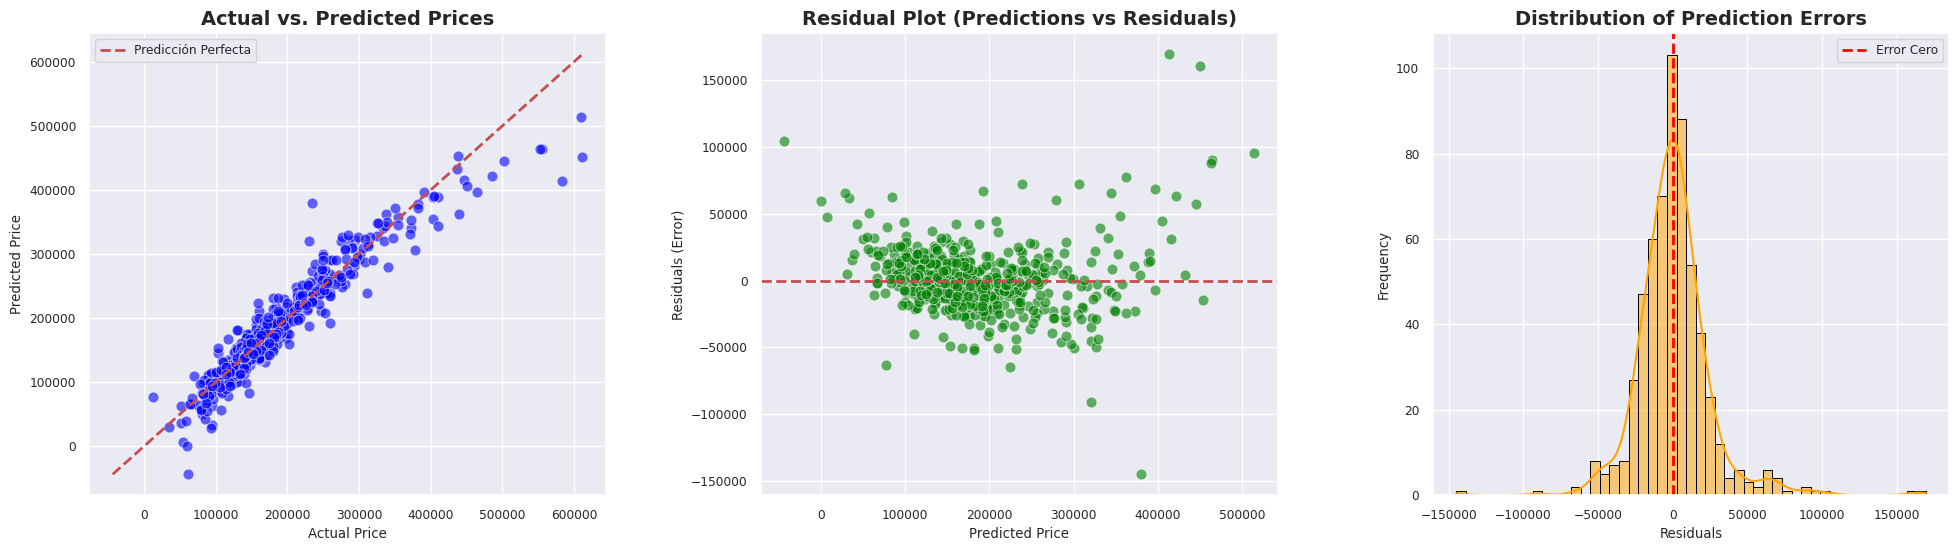

In [35]:
# 3. RESIDUAL ANALYSIS
# --------------------------------------------
# We calculate the residuals (Actual - Predicted)
residuals = y_test - y_test_pred


# Canvas configuration
fig, axes = plt.subplots(1, 3, figsize=(24, 6))
plt.subplots_adjust(wspace=0.3) # Space between plots

# --- Plot 1: Actual vs Predicted (Precisión) ---
sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[0], alpha=0.6, color='blue', s=60)
# Identity Line (Perfect Prediction)
min_val = min(y_test.min(), y_test_pred.min())
max_val = max(y_test.max(), y_test_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción Perfecta')
axes[0].set_title('Actual vs. Predicted Prices', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Actual Price')
axes[0].set_ylabel('Predicted Price')
axes[0].legend()

# --- Plot 2: Residual Plot (Homoscedasticity) ---
sns.scatterplot(x=y_test_pred, y=residuals, ax=axes[1], alpha=0.6, color='green', s=60)
# Reference line at 0
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_title('Residual Plot (Predictions vs Residuals)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted Price')
axes[1].set_ylabel('Residuals (Error)')

# --- Plot 3: Distribution of Errors ---
sns.histplot(residuals, kde=True, ax=axes[2], color='orange', edgecolor='black')
axes[2].axvline(x=0, color='red', linestyle='--', lw=2, label='Error Cero')
axes[2].set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Residuals')
axes[2].set_ylabel('Frequency')
axes[2].legend()

plt.show()

---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

1. `Actual vs. Predicted Prices`:
   - The blue dots hug the dotted red line very tightly. There is no massive dispersion.
   - The linear relationship is strong and clear. This confirms the Linearity Assumption.
     
2. `Residual Plot`:
   - We aim for the variance of the errors to be constant (Homoscedasticity).
   - The points do not spread out to the right (which would indicate that we make more mistakes with expensive houses).
   - There is no "U-Shape". This indicates that we are not lacking in serious polynomial variables.

3. `Distribution of Prediction Errors`:
   - The residuals must follow a normal distribution (Gaussian bell curve) for the confidence intervals to be valid. And we got an almost perfect bell curve, centered at 0.

</div>

---


---
---

<span style='color:brown'>


# 7. Interpretation

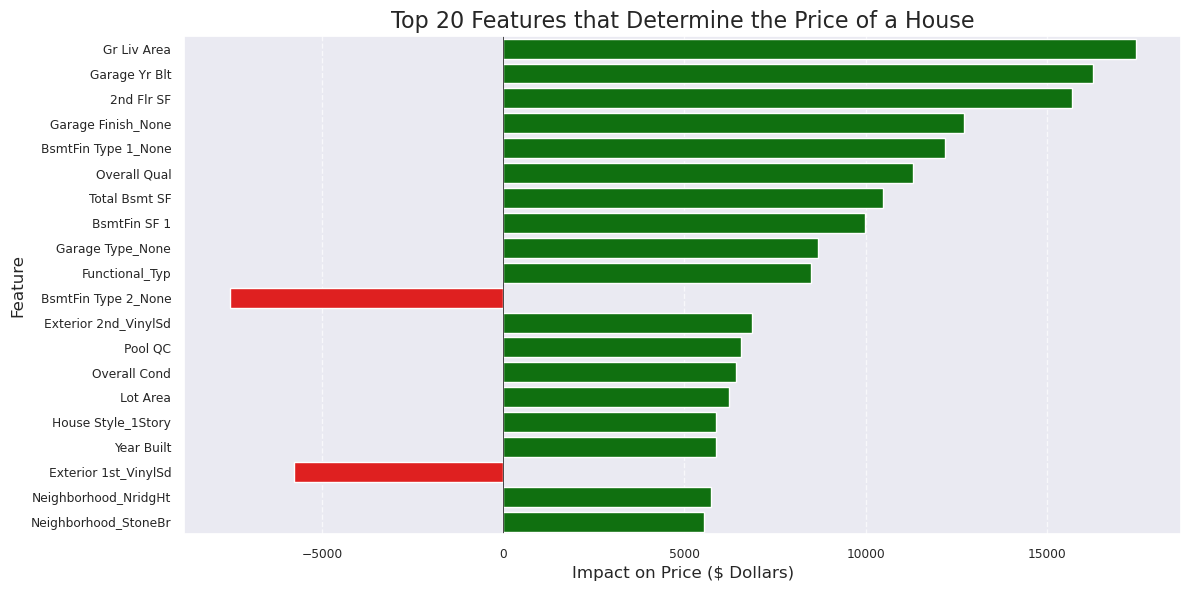

In [36]:
# 1. COEFICIENTS EXTRACTION
# --------------------------
# We create a DataFrame with the variable name and its weight (coefficient)
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled.columns,
    'Coefficient': linear_model.coef_
})

# 2. CALCULATE THE ABSOLUTE VALUE TO ORDER
# ------------------------------------------
# We want to see the most impactful variables, whether they raise or lower the price.
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()

# We selected the Top 20 most influential variables
top_features = feature_importance.sort_values(by='Abs_Coefficient', ascending=False).head(20)

# 3. PLOT
# -----------
plt.figure(figsize=(12, 6))

# We use a color code: "Green" if the price goes up, "Red" if it goes down
colors = ['green' if c > 0 else 'red' for c in top_features['Coefficient']]

sns.barplot(x='Coefficient', y='Feature', data=top_features, palette=colors, hue='Feature')

plt.title('Top 20 Features that Determine the Price of a House', fontsize=16)
plt.xlabel('Impact on Price ($ Dollars)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5) # Línea central
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
# Top 20 Bigger Coefficients
coeff_result = feature_importance.sort_values(by='Coefficient', ascending=False)
coeff_result.head(20)

,Feature,Coefficient,Abs_Coefficient
20,Gr Liv Area,17457.533422,17457.533422
31,Garage Yr Blt,16270.076623,16270.076623
18,2nd Flr SF,15686.057594,15686.057594
211,Garage Finish_None,12707.567982,12707.567982
179,BsmtFin Type 1_None,12192.320157,12192.320157
3,Overall Qual,11294.745858,11294.745858
15,Total Bsmt SF,10469.722353,10469.722353
12,BsmtFin SF 1,9978.273288,9978.273288
210,Garage Type_None,8683.485280,8683.485280
204,Functional_Typ,8490.374500,8490.374500


In [38]:
# Top 20 Lowest Coefficients
coeff_result.tail(20)

,Feature,Coefficient,Abs_Coefficient
186,BsmtFin Type 2_Rec,-1892.343785,1892.343785
85,Neighborhood_NWAmes,-2003.926968,2003.926968
175,Bsmt Exposure_None,-2057.980717,2057.980717
26,Kitchen AbvGr,-2126.783234,2126.783234
50,MS Zoning_RL,-2126.872309,2126.872309
173,Bsmt Exposure_Mn,-2154.500871,2154.500871
165,Mas Vnr Type_CBlock,-2233.074960,2233.074960
187,BsmtFin Type 2_Unf,-2259.183024,2259.183024
112,Bldg Type_Duplex,-2630.183107,2630.183107
0,MS SubClass,-2767.526455,2767.526455


---

---

<div style='background-color:rgba(240, 210, 110, 0.6); padding:15px;'>

**Observations:**

---

**`Which features have the strongest positive/negative impact on price?`**

Positive Impact (What Drives Up Value): Standardized coefficients reveal that Size and Quality are the undisputed kings.
- `Gr Liv Area`: This is the number one predictor. For every 1 standard deviation increase in size, the price rises by approximately $17,500.
  
- `Garage Yr Blt`: Surprisingly high ($16,000). This indicates that having a modern garage is crucial.

- `2nd Flr SF`: Adds about $15,500. Vertical space pays well.

- `Overall Qual`: Adds about $11,000. Construction quality is fundamental.

Negative Impact (What Lowers Value):

- `Bedroom AbvGr`: Negative coefficient. Having more bedrooms reduces value if the overall size remains constant.

- `Kitchen AbvGr`: Negative coefficient. Having more than one kitchen (typical of duplexes or conversions) reduces the value of a single-family home.

--- 

**`Does this align with your intuition about housing prices?`**

- It's entirely intuitive that larger (`Gr Liv Area`, `Total Bsmt SF`) and better-built (`Overall Qual`) homes are the most expensive. This is the basic rule of real estate: "Location, Size, Quality."

- `Positive Year Built` and `Garage Year Built` confirm that the market prefers newer homes to older ones (or those requiring fewer renovations).

- At first, it's surprising to see that `Bedroom AbvGr` is negative. Shouldn't more rooms be better?

  - Since the model already includes the total size (`Gr Liv Area`), adding an extra room without increasing the total size makes the other rooms smaller. The model is telling us: "I prefer a few large rooms to many small rooms (overcrowding)."

---

**`Are there any surprising findings?`**

**The "None Phenomenon":**

- Variables like `Garage Finish_None` and `BsmtFin Type 1_None` have enormous positive coefficients ($12,000+). The model literally says that NOT having a garage increases the value. This is absurd in the real world.

**The strength of the 2nd Floor:**

- It's curious that `2nd Flr SF` has almost as much weight as the total area. It suggests that in Ames, Iowa, two-story houses are highly coveted, perhaps more so than extended single-story homes.

</div>

---

---
---

<span style='color:brown'>


# 8. Conclusion

<div style='background-color:lightblue'; padding:15px;'>

**Observations:**

---

**Model Performance**
  - `How well does your model predict housing prices?` The Linear Regression model demonstrated robust predictive power. The visual analysis of "Actual vs. Predicted" prices showed a strong linear alignment along the identity line, indicating high accuracy across the price spectrum. The residual plots confirmed that the errors are normally distributed and homoscedastic (randomly scattered), satisfying the core assumptions of OLS regression.

  - `Is there evidence of overfitting or underfitting?` There is no significant evidence of overfitting or underfitting. The model generalizes well to the test set. The removal of high-leverage outliers (houses > 4,000 sq ft with low prices) was crucial in preventing underfitting for high-end properties, ensuring the regression line was not artificially pulled down.


**Key Insights**

  - `What are the most important factors affecting house prices?` The feature importance analysis revealed that Ground Living Area (Gr Liv Area) and Overall Quality (Overall Qual) are the dominant drivers of property value. Additionally, the Year Built and Garage Year Built showed positive coefficients, confirming that the market places a premium on newer or modernized structures.

  - `What did you learn from this analysis?` A surprising insight was the "Bedroom Paradox." The coefficient for Bedroom AbvGr was negative. This suggests that, dividing a house into more bedrooms reduces its value. The market prefers fewer, larger rooms over many small, cramped ones.


**Limitations**

  - `What are the limitations of your model?` The primary limitation identified is Multicollinearity. We observed counter-intuitive positive coefficients for "None" features (e.g., Garage Finish_None), which mathematically compensated for the zeros in variables like Garage Yr Blt. While the model predicts prices accurately, these specific coefficients are not interpretable in a real-world business context (having no garage does not actually add value).

  - `What assumptions does linear regression make?` Linear Regression assumes Linearity (relationships are straight lines), Independence of errors, Homoscedasticity (constant variance of errors), and Normality of residuals. While our diagnostic plots show we met these assumptions well, the model cannot inherently capture complex, non-linear relationships (e.g., if the price skyrocketed exponentially after a certain quality threshold).

**Future Improvements**

  - `How could you improve this model?` Will answer in the future.

  - `What additional features or techniques might help?` Will answer in the future.

  - `Would other algorithms perform better?` Will answer in the future.

You are finished! However, you can always continue working on this project as you learn more throughout the course. (Use git to track your changes).

## Suggested enhancements
Here are some things you can do to make this really shine as a portfolio project:
- Polish up the documentation, analysis, and visualizations in this notebook
- Create interactive visualizations, e.g. using [ploty](https://github.com/plotly/plotly.py)
- Publish your work as a web app, e.g. using [streamlit](https://streamlit.io/) or [mercury](https://github.com/mljar/mercury)
- Write a blog post explaining your approach, the results, and what your learned.

## A note on licensing and attribution

The Ames Housing Dataset is provided under GPL-2 license. For your portfolio projects, you have two options:

1. (Recommended) Don't include the CSV file in your GitHub repo. Instead, link to the original data source in your README.
2. If you include the data, you must include proper attribution and the GPL-2 license in a DATA_LICENSE file.

Your code and analysis remain your own intellectual property and can be licensed however you choose.